Project Name:-Academic Performance Predictor 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
# Load the dataset
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)

In [6]:
# Display first few rows of the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


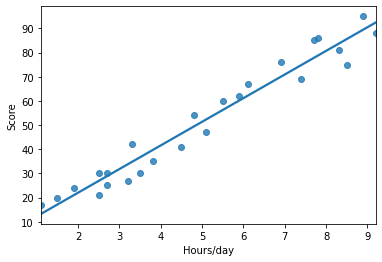

In [7]:
# Visualize the data with a regression plot
sns.regplot(data=df, x='Hours', y='Scores', ci=None)
plt.xlabel('Hours/day')
plt.ylabel('Score')
plt.show()


In [8]:
# Display correlation matrix
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [9]:

# Split the data into inputs (X) and outputs (y)
x = df['Hours'].values.reshape(-1, 1)
y = df['Scores'].values.reshape(-1, 1)

In [10]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
# Initialize and train the Linear Regression model
reg = LinearRegression()
reg.fit(x_train, y_train)

# Model training completion message
print('Model Trained')

Model Trained


In [12]:
# Predict the scores using the test set
y_pred = reg.predict(x_test)

In [13]:
# Compare actual vs predicted scores
new_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(new_df)

   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


In [14]:

# Predict score for a student who studies 9.5 hours
hours = np.array(9.5).reshape(-1, 1)
predicted = reg.predict(hours)
print(f'''
No of hours: {hours.flatten()[0]}
Marks predicted: {predicted.flatten()[0]}
''')


No of hours: 9.5
Marks predicted: 94.80663482122885



In [15]:
# Model evaluation metrics for the test set
test_r2 = reg.score(x_test, y_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test R²: {:.2f}".format(test_r2))
print("Test RMSE: {:.2f}".format(test_rmse))


Test R²: 0.97
Test RMSE: 4.35


In [16]:
# Model evaluation metrics for the training set
y_train_pred = reg.predict(x_train)
train_r2 = reg.score(x_train, y_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Training R²: {:.2f}".format(train_r2))
print("Training RMSE: {:.2f}".format(train_rmse))

Training R²: 0.95
Training RMSE: 5.61


In [20]:
# Compare the performance
if train_r2 > test_r2:
    print("Potential overfitting detected. The model performs better on the training set than the test set.")
else:
    print("No overfitting detected. Model generalizes well.")

No overfitting detected. Model generalizes well.
